# Clustering
---

## k-Means Algorithm

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris.data)

df['cluster'] = kmeans.labels_
df['component1'] = iris_pca[:, 0]
df['component2'] = iris_pca[:, 1]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,component1,component2
0,5.1,3.5,1.4,0.2,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,-2.728717,0.326755


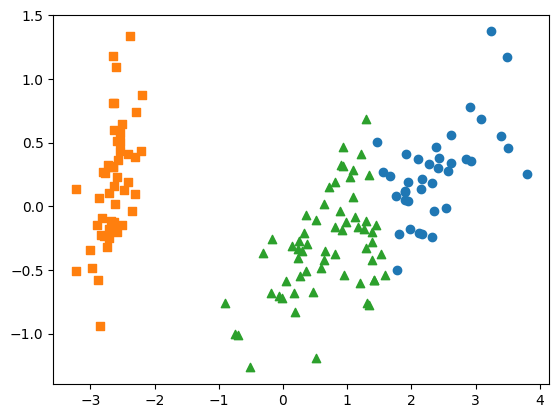

In [5]:
import matplotlib.pyplot as plt

index_0 = df[df['cluster'] == 0].index
index_1 = df[df['cluster'] == 1].index
index_2 = df[df['cluster'] == 2].index

plt.scatter(x=df.loc[index_0, 'component1'], y=df.loc[index_0, 'component2'], marker='o')
plt.scatter(x=df.loc[index_1, 'component1'], y=df.loc[index_1, 'component2'], marker='s')
plt.scatter(x=df.loc[index_2, 'component1'], y=df.loc[index_2, 'component2'], marker='^')
plt.show()

In [6]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8)
print(X.shape, y.shape)
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [7]:
df = pd.DataFrame(data=X, columns=['feature1', 'feature2'])
df['target'] = y
df.head()

,feature1,feature2,target
0,4.265555,10.298361,1
1,-3.836959,-8.803002,0
2,-3.385566,-10.407137,0
3,-3.557840,-10.049917,0
4,5.707562,8.832689,1


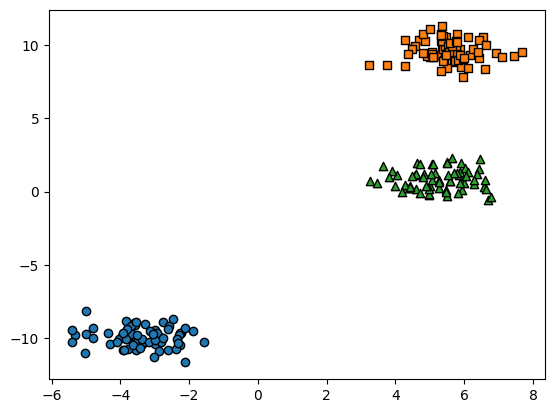

In [8]:
targets = np.unique(y)
markers = ['o', 's', '^']
for target in targets:
    cluster = df[df['target'] == target]
    plt.scatter(x=cluster['feature1'], y=cluster['feature2'],
                edgecolors='k', marker=markers[target])
plt.show()

c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


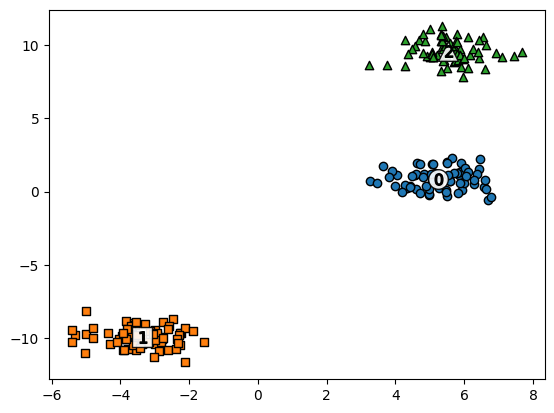

In [9]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)
df['label'] = labels
centers = kmeans.cluster_centers_
uniques = np.unique(labels)
markers = ['o', 's', '^']
for label in uniques:
    cluster = df[df['label'] == label]
    center = centers[label]
    plt.scatter(x=cluster['feature1'], y=cluster['feature2'], edgecolor='k', marker=markers[label])
    plt.scatter(x=center[0], y=center[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center[0], y=center[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()

In [10]:
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
df['cluster'] = kmeans.labels_

df['silhouette_coeff'] = silhouette_samples(iris.data, df['cluster'])
average_score = silhouette_score(iris.data, df['cluster'])
print(average_score)

df.head()

0.5528190123564095


c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [11]:
df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

## Mean Shift

In [12]:
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7)
meanshift = MeanShift(bandwidth=0.8)
y_hat = meanshift.fit_predict(X)
print(np.unique(y_hat))

[0 1 2 3 4 5 6 7]


In [13]:
meanshift = MeanShift(bandwidth=1)
y_hat = meanshift.fit_predict(X)
print(np.unique(y_hat))

[0 1 2 3 4]


In [14]:
from sklearn.cluster import estimate_bandwidth

bw = estimate_bandwidth(X)
print('estimate_bandwidth :', bw)
meanshift = MeanShift(bandwidth=bw)
y_hat = meanshift.fit_predict(X)
print(np.unique(y_hat))

estimate_bandwidth : 1.8194322042643492
[0 1]


[[-6.5607097   1.68812715]
 [ 1.05440104  3.96369555]]


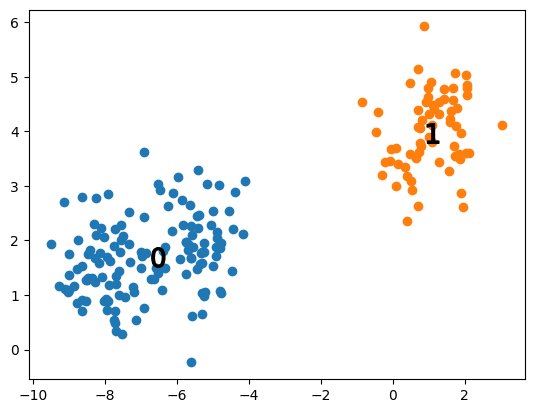

In [15]:
centers = meanshift.cluster_centers_
print(centers)
labels = np.unique(y_hat)

for label in labels:
    XX = X[y_hat==label]
    center = centers[label]
    plt.scatter(x=XX[:, 0], y=XX[:, 1])
    plt.scatter(x=center[0], y=center[1], s=200, color='k', marker='$%d$' %label)
plt.show()

## GMM

In [16]:
from sklearn.mixture import GaussianMixture

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

gm = GaussianMixture(n_components=3)
df['cluster'] = gm.fit_predict(iris.data)
print(df.groupby(['target'])['cluster'].value_counts())

target  cluster
0       1          50
1       2          45
        0           5
2       0          50
Name: count, dtype: int64


In [17]:
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(iris.data)
print(df.groupby(['target'])['cluster'].value_counts())

target  cluster
0       1          50
1       0          48
        2           2
2       2          36
        0          14
Name: count, dtype: int64


c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


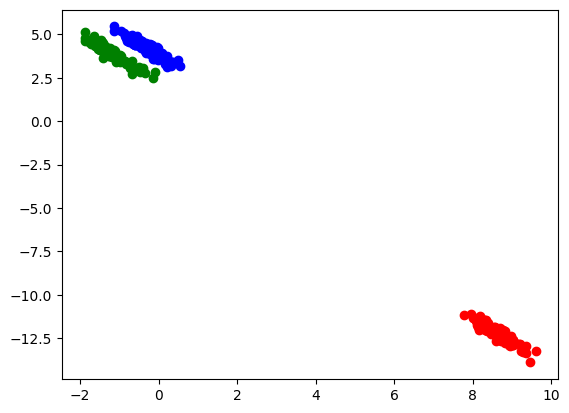

In [21]:
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5)
transformation = [[0.6083, -0.6367],
                  [-0.4089, 0.8525]]
X = np.dot(X, transformation)
labels = np.unique(y)
colors = ['r', 'g', 'b']
for label in labels:
    XX = X[y==label]
    plt.scatter(x=XX[:,0], y=XX[:,1], c=colors[label])
plt.show()

c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


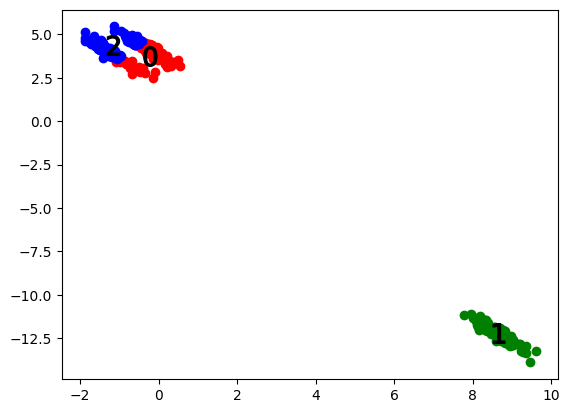

In [22]:
df = pd.DataFrame(data=X, columns=['feature1', 'feature2'])
kmeans = KMeans(n_clusters=3)
df['kmeans'] = kmeans.fit_predict(X)

centers = kmeans.cluster_centers_
labels = np.unique(df['kmeans'].values)
for label in labels:
    XX = df[df['kmeans']==label]
    center = centers[label]
    plt.scatter(x=XX['feature1'], y=XX['feature2'], color=colors[label])
    plt.scatter(x=center[0], y=center[1], s=200, color='k', marker='$%d$' % label)
plt.show()

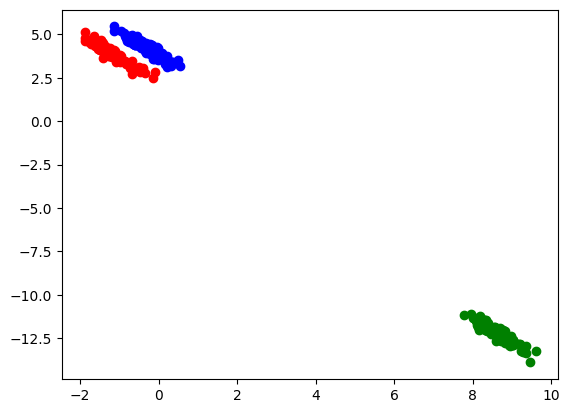

In [23]:
gm = GaussianMixture(n_components=3)
df['gm'] = gm.fit_predict(X)

labels = np.unique(df['gm'].values)
for label in labels:
    XX = df[df['gm'] == label]
    plt.scatter(x=XX['feature1'], y=XX['feature2'], color=colors[label])
plt.show()

In [24]:
df['target'] = y
print(df.groupby('target')['kmeans'].value_counts())
print(df.groupby('target')['gm'].value_counts())

target  kmeans
0       1         100
1       2          78
        0          22
2       0          67
        2          33
Name: count, dtype: int64
target  gm
0       1     100
1       0     100
2       2     100
Name: count, dtype: int64


## DBSCAN

In [25]:
from sklearn.cluster import DBSCAN

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

dbscan = DBSCAN(eps=0.6, min_samples=8)
df['dbscan'] = dbscan.fit_predict(iris.data)
print(df.groupby('target')['dbscan'].value_counts())

target  dbscan
0        0        49
        -1         1
1        1        46
        -1         4
2        1        42
        -1         8
Name: count, dtype: int64


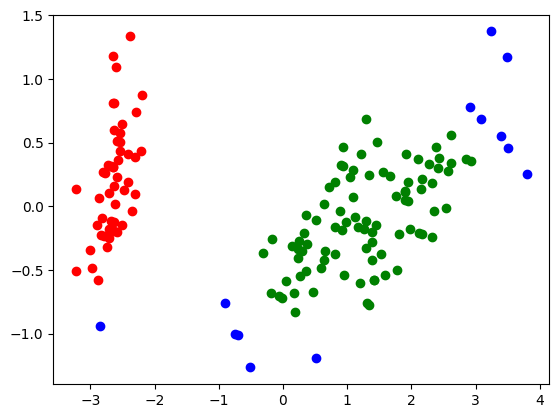

In [26]:
pca = PCA(n_components=2)
data = pca.fit_transform(iris.data)
df['feature1'] = data[:,0]
df['feature2'] = data[:,1]

labels = np.unique(df['dbscan'].values)
for label in labels:
    XX = df[df['dbscan']==label]
    plt.scatter(x=XX['feature1'], y=XX['feature2'], color=colors[label])
plt.show()

target  dbscan
0        0        50
1        1        50
2        1        47
        -1         3
Name: count, dtype: int64


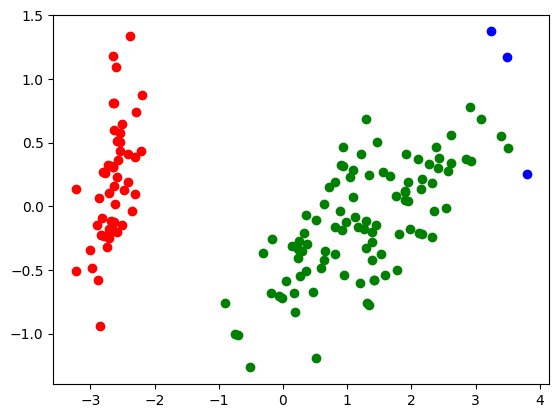

In [27]:
dbscan = DBSCAN(eps=0.8, min_samples=8)
df['dbscan'] = dbscan.fit_predict(iris.data)
print(df.groupby('target')['dbscan'].value_counts())

df['feature1'] = data[:,0]
df['feature2'] = data[:,1]

labels = np.unique(df['dbscan'].values)
for label in labels:
    XX = df[df['dbscan']==label]
    plt.scatter(x=XX['feature1'], y=XX['feature2'], color=colors[label])
plt.show()

target  dbscan
0        0        48
        -1         2
1        1        44
        -1         6
2        1        36
        -1        14
Name: count, dtype: int64


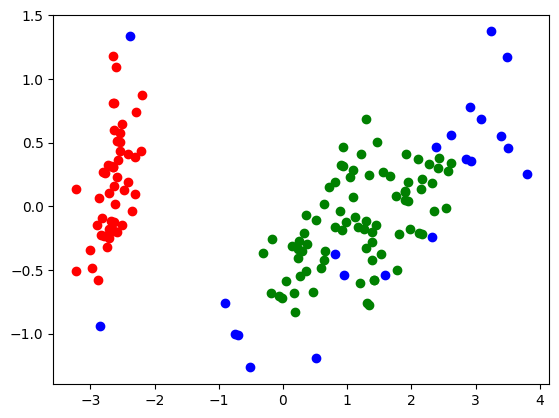

In [28]:
dbscan = DBSCAN(eps=0.6, min_samples=16)
df['dbscan'] = dbscan.fit_predict(iris.data)
print(df.groupby('target')['dbscan'].value_counts())

df['feature1'] = data[:,0]
df['feature2'] = data[:,1]

labels = np.unique(df['dbscan'].values)
for label in labels:
    XX = df[df['dbscan']==label]
    plt.scatter(x=XX['feature1'], y=XX['feature2'], color=colors[label])
plt.show()

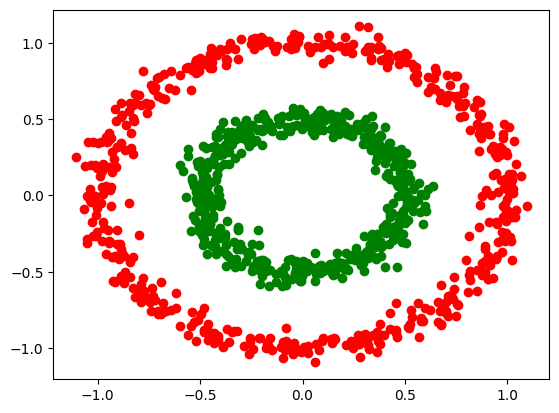

In [29]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, factor=0.5)
df = pd.DataFrame(data=X, columns=['feature1', 'feature2'])
df['target'] = y

labels = np.unique(y)
for label in labels:
    XX = df[df['target']==label]
    plt.scatter(x=XX['feature1'], y=XX['feature2'], color=colors[label])
plt.show()

c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


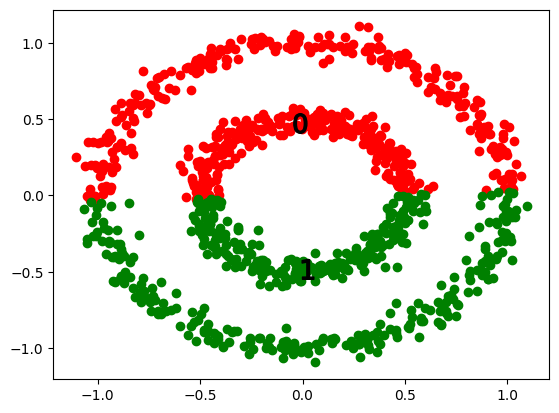

In [ ]:
kmeans = KMeans(n_clusters=2)
df['kmeans'] = kmeans.fit_predict(X)

centers = kmeans.cluster_centers_
labels = np.unique(df['kmeans'].values)
for label in labels:
    XX = df[df['kmeans']==label]
    center = centers[label]
    plt.scatter(x=XX['feature1'], y=XX['feature2'], color=colors[label])
    plt.scatter(x=center[0], y=center[1], s=200, color='k', marker='$%d$' % label)
plt.show()

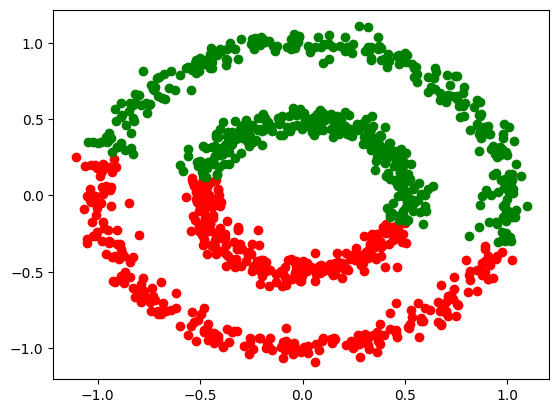

In [31]:
gm = GaussianMixture(n_components=2)
df['gm'] = gm.fit_predict(X)

labels = np.unique(df['gm'].values)
for label in labels:
    XX = df[df['gm']==label]
    plt.scatter(x=XX['feature1'], y=XX['feature2'], color=colors[label])
plt.show()

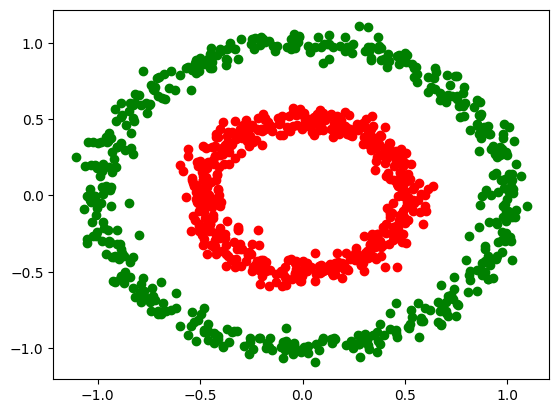

In [32]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
df['dbscan'] = dbscan.fit_predict(X)

labels = np.unique(df['dbscan'].values)
for label in labels:
    XX = df[df['dbscan']==label]
    plt.scatter(x=XX['feature1'], y=XX['feature2'], color=colors[label])
plt.show()

## 고객 세그멘테이션

In [37]:
df = pd.read_excel('C:/Example/retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [39]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df = df[df['CustomerID'].notnull()]
print(df.shape)
df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [40]:
df['Country'].value_counts()[:5]

Country
United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: count, dtype: int64

In [41]:
df = df[df['Country'] == 'United Kingdom']
print(df.shape)

(354321, 8)


In [42]:
df['sale_amount'] = df['Quantity'] * df['UnitPrice']
df['CustomerID'] = df['CustomerID'].astype(int)

In [43]:
print(df['CustomerID'].value_counts().head(5))
print(df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: count, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [44]:
aggs = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount': 'sum'
}
df2 = df.groupby('CustomerID').agg(aggs)
df2 = df2.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'sale_amount': 'Monetary'})
df2 = df2.reset_index()
df2.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73
3,12749,2011-12-06 09:56:00,199,4090.88
4,12820,2011-12-06 15:12:00,59,942.34


In [45]:
import datetime as dt

df2['Recency'] = dt.datetime(2011, 12, 10) - df2['Recency']
df2['Recency'] = df2['Recency'].apply(lambda x: x.days + 1)
df2.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73
3,12749,4,199,4090.88
4,12820,4,59,942.34


(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

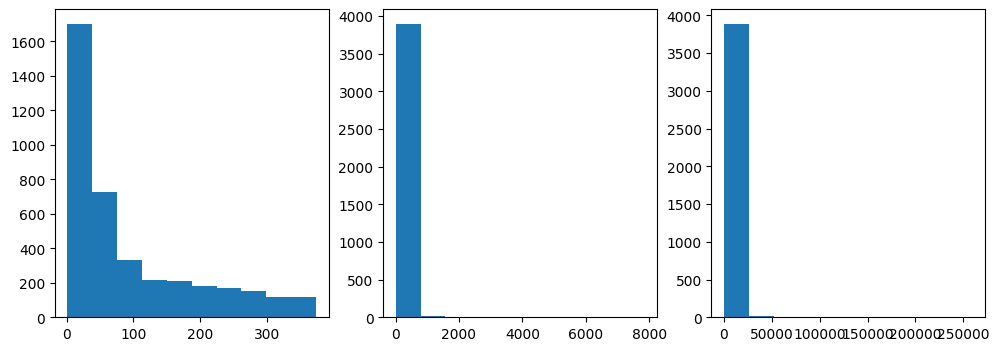

In [46]:
fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)
axs[0].hist(df2['Recency'])
axs[1].hist(df2['Frequency'])
axs[2].hist(df2['Monetary'])

In [47]:
df2.describe()

,CustomerID,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,15562.059694,92.742092,90.388010,1864.385601
std,1576.594671,99.533485,217.808385,7482.817477
min,12346.000000,1.000000,1.000000,3.750000
25%,14208.750000,18.000000,17.000000,300.280000
50%,15569.500000,51.000000,41.000000,652.280000
75%,16913.250000,143.000000,99.250000,1576.585000
max,18287.000000,374.000000,7847.000000,259657.300000


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X = df2[['Recency', 'Frequency', 'Monetary']].values
X = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)
df2['label'] = labels
print(silhouette_score(X, labels))

c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.5923691942714455


In [50]:
def visualize_silhouette(cluster_lists, X_features):
    import numpy as np
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로클러스터링갯수들을리스트로받아서, 각 갯수별로클러스터링을적용하고실루엣개수를구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                           'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([]) # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                   facecolor=color, edgecolor=color, alpha=0.7)
            
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

def visualize_kmeans_plot_multi(cluster_lists, X_features):
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장.
        clusterer = KMeans(n_clusters = n_cluster, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels

        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']

        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                             edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))
        axs[ind].legend(loc='upper right')
    plt.show()

c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

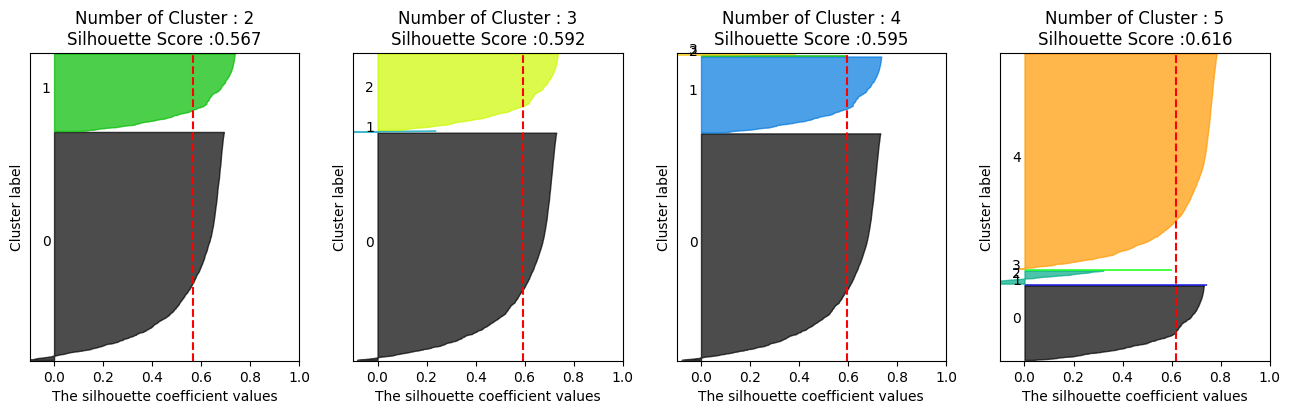

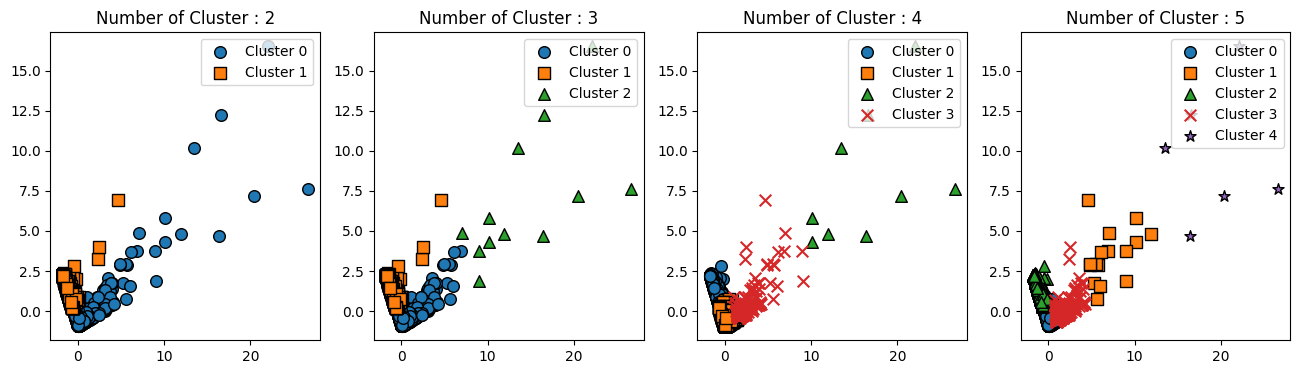

In [52]:
visualize_silhouette([2, 3, 4, 5], X)
visualize_kmeans_plot_multi([2, 3, 4, 5], X)

In [53]:
df2['Recency'] = np.log1p(df2['Recency'])
df2['Frequency'] = np.log1p(df2['Frequency'])
df2['Monetary'] = np.log1p(df2['Monetary'])

X = df2[['Recency', 'Frequency', 'Monetary']].values
X = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)
df2['label'] = labels

print(silhouette_score(X, labels))

c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.30398209533505066


c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

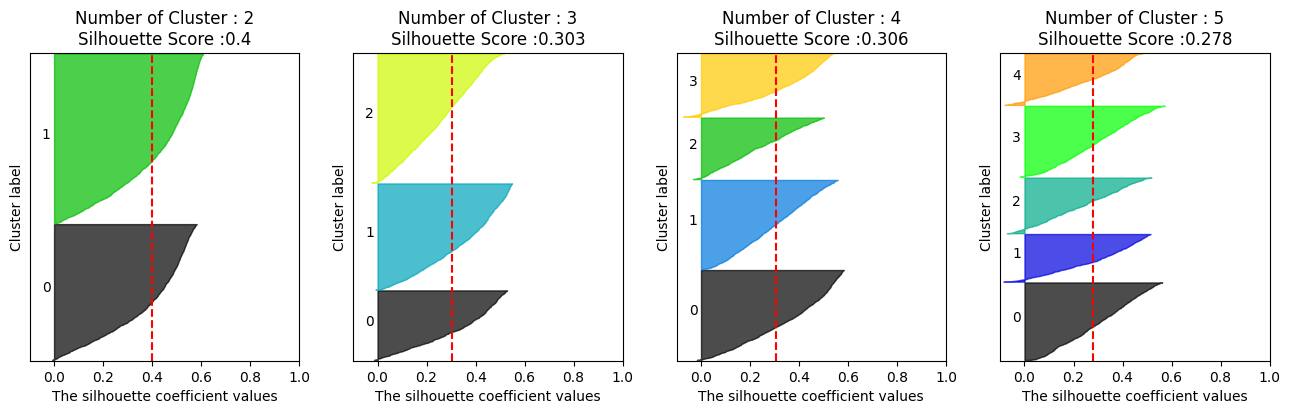

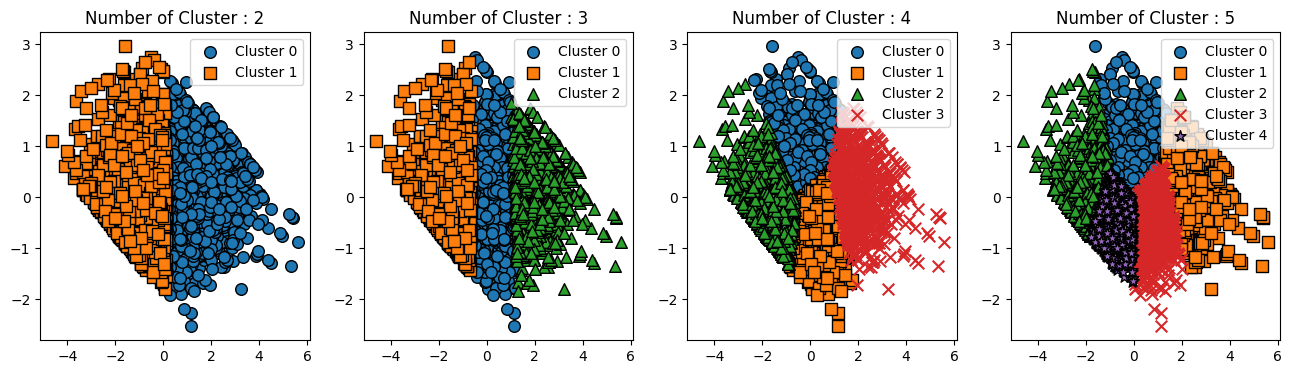

In [54]:
visualize_silhouette([2, 3, 4, 5], X)
visualize_kmeans_plot_multi([2, 3, 4, 5], X)